In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import nltk
# nltk.download('stopwords')

In [4]:
from nltk.corpus import stopwords

In [ ]:
cd

In [11]:
pwd

'/home/siavash'

In [23]:
df= pd.read_csv('PythonBootcampDataScience/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection',
                sep='\t',names=['target','msg'])

In [24]:
df['len']= df['msg'].apply(len)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
target    5572 non-null object
msg       5572 non-null object
len       5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [130]:
df.describe(include='all')

,target,msg,len
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.489950
std,NaN,NaN,59.942907
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,62.000000
75%,NaN,NaN,122.000000


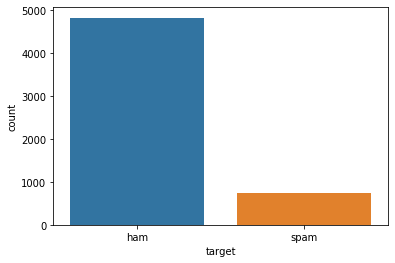

In [26]:
sns.countplot(x='target',data=df)

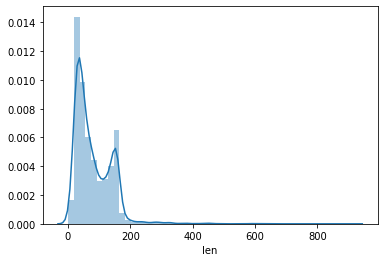

In [15]:
sns.distplot(a=df['len'])

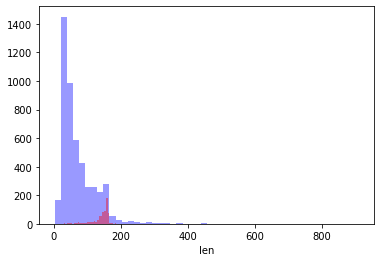

In [27]:
sns.distplot(a=df[df['target']=='ham']['len'],color='b',kde=False)
sns.distplot(a=df[df['target']=='spam']['len'],color='r',kde=False)

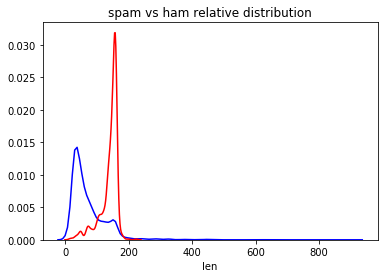

In [28]:
sns.distplot(a=df[df['target']=='ham']['len'],color='b',hist=False).set_title('spam vs ham relative distribution')
sns.distplot(a=df[df['target']=='spam']['len'],color='r',hist=False)

In [21]:
from sklearn.model_selection import train_test_split

In [29]:
X= df['msg']
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
X= df['len']
y= df['target']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow= CountVectorizer(stop_words=stopwords.words('english'))

In [31]:
bow.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [36]:
cv_transformed= bow.transform(X_train)

In [169]:
pd.DataFrame(cv_transformed.toarray())

,0,1,2,3,4,5,6,7,8,9,...,6937,6938,6939,6940,6941,6942,6943,6944,6945,6946
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
cv_transformed.count_nonzero()

31969

In [113]:
cv_transformed.nnz

31969

In [110]:
cv_transformed.shape

(3733, 6947)

In [115]:
3733*6947

25933151

In [126]:
sparsity = 1-(cv_transformed.nnz / (cv_transformed.shape[0] * cv_transformed.shape[1]))
100*sparsity

99.87672535435436

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
tfidf= TfidfTransformer().fit(cv_transformed)

In [42]:
tfidf_transformed= tfidf.transform(cv_transformed)

In [44]:
tfidf_transformed.shape

(3733, 6947)

In [172]:
text_ana= pd.DataFrame(tfidf_transformed.toarray())

In [183]:
text_ana.shape

(3733, 6947)

In [184]:
X_train_2.shape

(3733,)

In [185]:
new_X_train= pd.concat([text_ana,X_train_2],axis=1)

In [186]:
new_X_train.shape

(4984, 6948)

In [177]:
model= MultinomialNB()
model.fit(new_X_train,y_train)
y_hat= model.predict(tfidf.transform(bow.transform(X_test)))
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
mnb.fit(tfidf_transformed,y_train)
y_hat= mnb.predict(tfidf.transform(bow.transform(X_test)))

In [154]:
from sklearn.naive_bayes import MultinomialNB

In [155]:
mnb= MultinomialNB()

In [156]:
mnb.fit(tfidf_transformed,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [158]:
y_hat= mnb.predict(tfidf.transform(bow.transform(X_test)))

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
model= MultinomialNB()
model.fit(tfidf_transformed,y_train)
y_hat= model.predict(tfidf.transform(bow.transform(X_test)))

In [161]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [162]:
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.9733550842849374 
 [[1593    0]
 [  49  197]] 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1593
        spam       1.00      0.80      0.89       246

    accuracy                           0.97      1839
   macro avg       0.99      0.90      0.94      1839
weighted avg       0.97      0.97      0.97      1839



In [165]:
print(accuracy_score(y_test,y_hat),'\n',
      confusion_matrix(y_test,y_hat),'\n',
      classification_report(y_test,y_hat))

0.9733550842849374 
 [[1593    0]
 [  49  197]] 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1593
        spam       1.00      0.80      0.89       246

    accuracy                           0.97      1839
   macro avg       0.99      0.90      0.94      1839
weighted avg       0.97      0.97      0.97      1839



In [59]:
mm= ['Hi! My name is Sia. This is my laptop: (Sony) What is your name?']

In [50]:
bow.vocabulary_

{'yup': 6934,
 'comin': 1711,
 'sent': 5424,
 'scores': 5355,
 'sophas': 5698,
 'secondary': 5380,
 'application': 924,
 'schools': 5349,
 'think': 6143,
 'thinking': 6146,
 'applying': 927,
 'research': 5156,
 'cost': 1810,
 'also': 842,
 'contact': 1772,
 'joke': 3438,
 'ogunrinde': 4412,
 'school': 5348,
 'one': 4439,
 'less': 3662,
 'expensive': 2436,
 'ones': 4440,
 'kothi': 3557,
 'print': 4873,
 'marandratha': 3900,
 'effect': 2274,
 'irritation': 3356,
 'ignore': 3227,
 'asked': 982,
 'call': 1430,
 'ok': 4417,
 'whatever': 6708,
 'juliana': 3461,
 'want': 6630,
 'hello': 3055,
 'got': 2886,
 'st': 5788,
 'andrews': 871,
 'boy': 1309,
 'long': 3758,
 'way': 6660,
 'cold': 1686,
 'keep': 3499,
 'posted': 4796,
 'sir': 5573,
 'hr': 3162,
 'trip': 6320,
 'bus': 1397,
 'last': 3605,
 'week': 6682,
 'another': 884,
 'audition': 1016,
 'next': 4285,
 'wednesday': 6679,
 'might': 4019,
 'drive': 2194,
 'time': 6195,
 'ur': 6468,
 'physics': 4670,
 'get': 2805,
 'okie': 4422,
 'see': 5

In [68]:
bow.vocabulary_['sony']

5690

In [127]:
len(bow.vocabulary_)

6947

In [61]:
mm

['Hi! My name is Sia. This is my laptop: (Sony) What is your name?']